In [1]:

import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../data/physionet.org/files/ptb-xl/1.0.2/'
sampling_rate=100

# Load data

In [3]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [4]:

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))


# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def aggregate_diagnostic_subclass(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_diagnostic_subclass)


Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,diagnostic_superclass,diagnostic_subclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,False,True,False,False,False,False,False,True,[STTC],[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,False,False,False,False,False,False,False,False,[NORM],[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,False,False,False,False,False,False,False,False,[STTC],[ISCA]


In [5]:

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)


In [6]:
X.shape

(21801, 1000, 12)

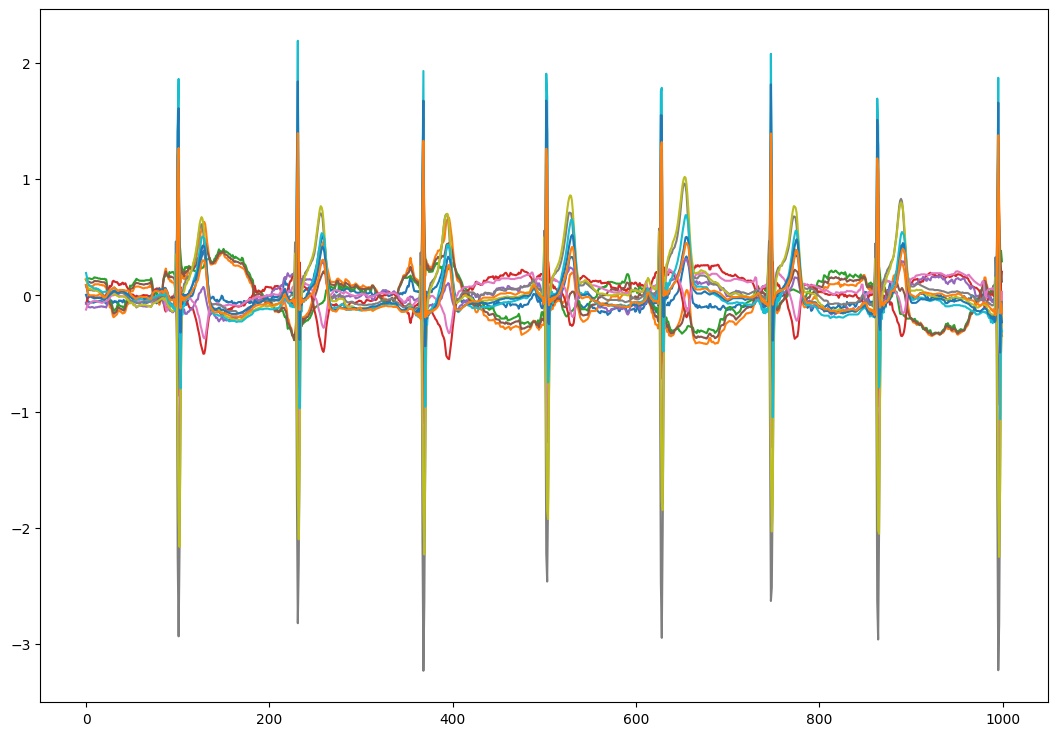

In [7]:
ecg_data = X[1]



fig, ax = plt.subplots(figsize=(13, 9))


# Create a line plot for each feature
for i, feature in enumerate(range(ecg_data.shape[1])):
    plt.plot(ecg_data[:, feature] , label=f'Feature {feature + 1}')
    
    

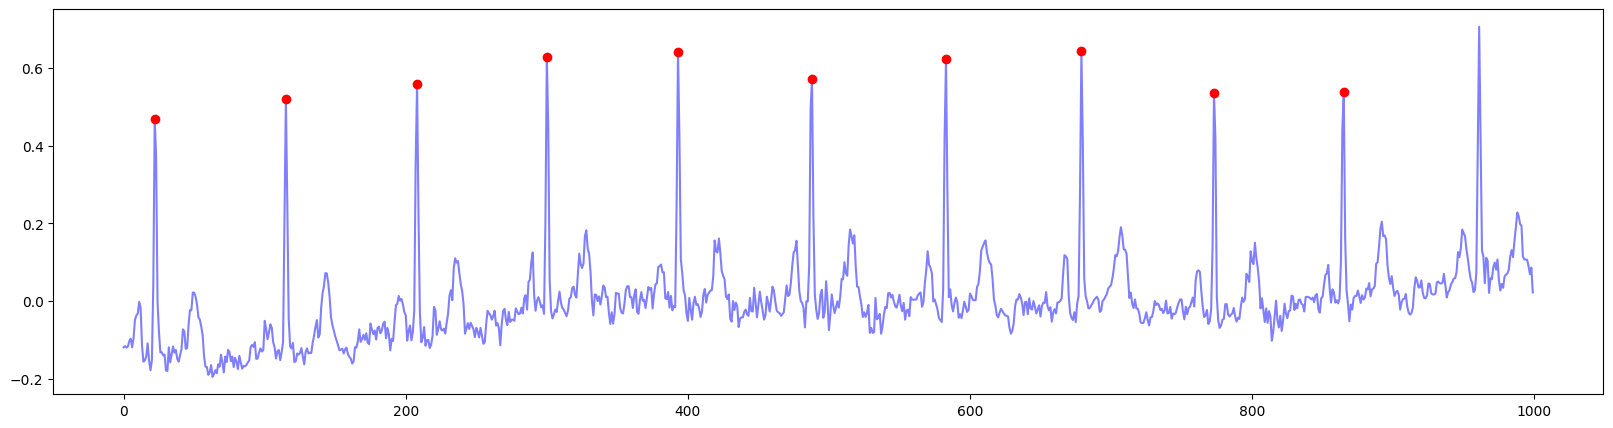

In [10]:
import numpy as np
from biosppy.signals import ecg

ecg_signal = X[0]

# Peak detection using biosppy
out = ecg.ecg(signal=ecg_signal[:, 0], sampling_rate=sampling_rate, show=False)
r_peaks = out['rpeaks']

# plot the signal
plt.figure(figsize=(20, 5))
plt.plot(ecg_signal[:, 0], alpha=0.5, color='blue')
plt.plot(r_peaks, ecg_signal[r_peaks, 0], 'ro')


In [11]:
# Calculate RR intervals
rr_intervals = np.diff(r_peaks) / sampling_rate

# Calculate heart rate
heart_rate_bpm = 60 / np.mean(rr_intervals)

print(f"Heart Rate: {heart_rate_bpm:.2f} bpm")


Heart Rate: 64.06 bpm


In [12]:
# ok, let's turn this into a function

def get_heart_beat(ecg_signal):
    
    # Peak detection using biosppy
    out = ecg.ecg(signal=ecg_signal[:, 0], sampling_rate=sampling_rate, show=False)
    r_peaks = out['rpeaks']
    
    # Calculate RR intervals
    rr_intervals = np.diff(r_peaks) / sampling_rate

    # Calculate heart rate
    heart_rate_bpm = 60 / np.mean(rr_intervals)
    
    return heart_rate_bpm
    
    

In [20]:
from tqdm import tqdm

x_subset = X[:10240]
heart_beats = [get_heart_beat(x) for x in tqdm(x_subset)]

100%|██████████| 10240/10240 [00:21<00:00, 467.56it/s]


Text(0.5, 0, 'Heart beat speed (bpm)')

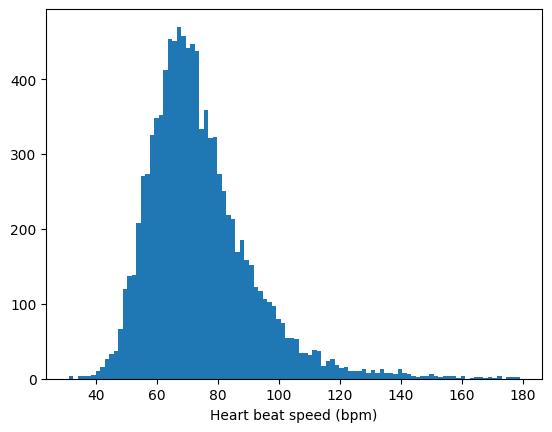

In [21]:
import matplotlib.pyplot as plt

plt.hist(heart_beats, bins=100);

plt.xlabel('Heart beat speed (bpm)')

OK, let's visualize heart beat data across the classes.

In [28]:
y_subset = Y['diagnostic_superclass'][:10240]
classes = sorted(list(set(np.concatenate(y_subset.values))))
classes

['CD', 'HYP', 'MI', 'NORM', 'STTC']

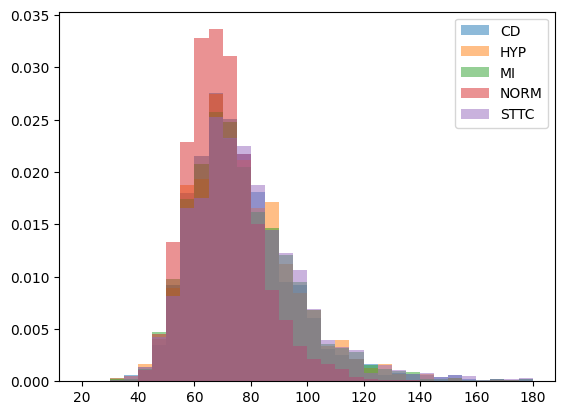

In [61]:
# get indices
indices = {}
heart_beats_class = {}
bin_edges = list(range(20, 181, 5))


for indx, class_name in enumerate(classes):
    
    indices[class_name] = [] 
    
    for i, y in enumerate(y_subset):
        if class_name in y:
            indices[class_name].append(i)

    heart_beats_class[class_name] = np.array(heart_beats)[indices[class_name]]
    
    # plot histogram of heart beat speeds   
    plt.hist(heart_beats_class[class_name], bin_edges, density=True, alpha=0.5, label=class_name)

plt.legend(loc='upper right')

# ok

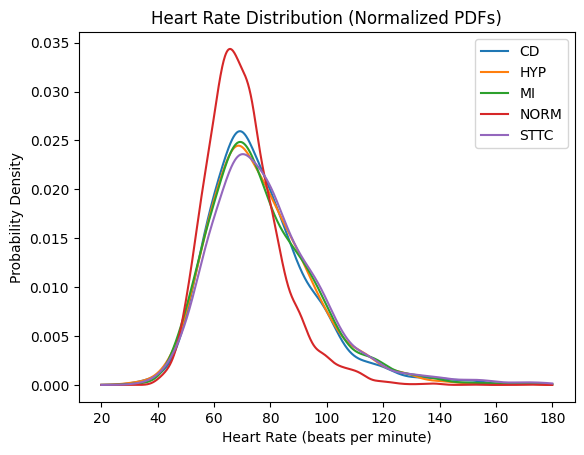

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# get indices
indices = {}
heart_beats_class = {}

for indx, class_name in enumerate(classes):
    indices[class_name] = []
    
    for i, y in enumerate(y_subset):
        if class_name in y:
            indices[class_name].append(i)

    heart_beats_class[class_name] = np.array(heart_beats)[indices[class_name]]

x_range = np.linspace(20, 180, 1000)

fig, ax = plt.subplots()

# Plot normalized PDFs using KDE
for class_name in classes:
    kde = gaussian_kde(heart_beats_class[class_name])
    y_vals = kde(x_range)
    ax.plot(x_range, y_vals, label=class_name)

# Set labels and title
ax.set_xlabel('Heart Rate (beats per minute)')
ax.set_ylabel('Probability Density')
ax.set_title('Heart Rate Distribution (Normalized PDFs)')
ax.legend()

# Show the plot
plt.show()
